In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import math
import matplotlib as mpl
from iminuit import Minuit

In [2]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

# Set the background color of the plot to ghostwhite
axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'lightgreen', 'orange', 'orchid', 'navy']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

# Exercise 0.5

In [3]:
data = np.loadtxt('data1.txt')

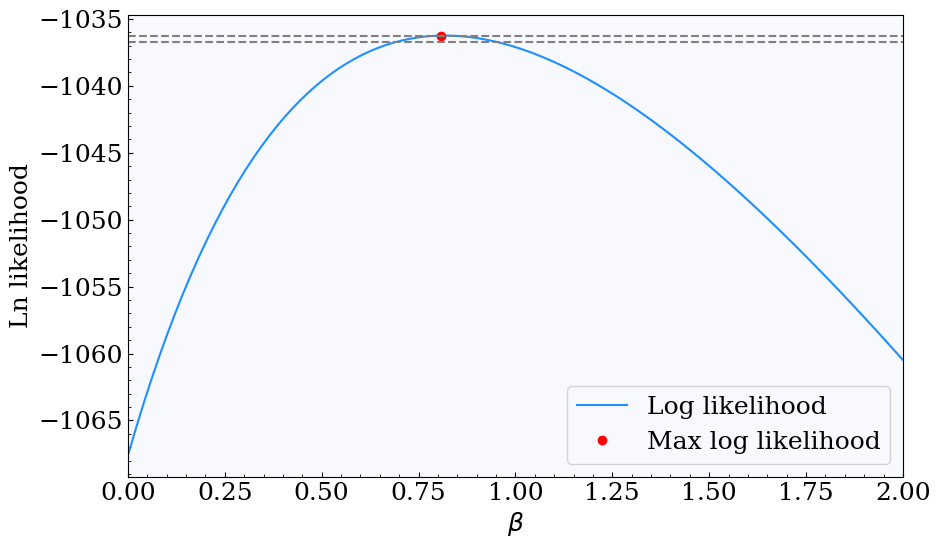

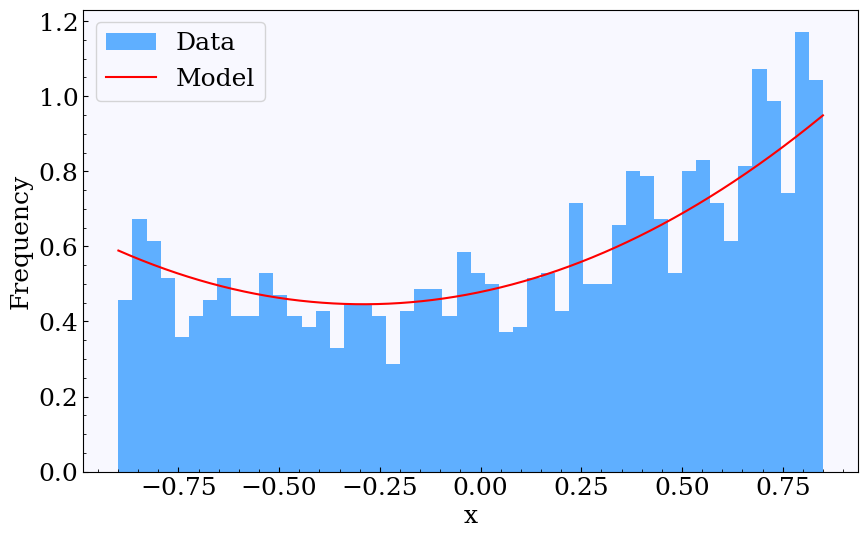

In [4]:
def func(x, beta): 
    func = 1 + 0.47 * x + beta * x**2
    func /= scipy.integrate.trapz(func, x)
    return func

def log_likelihood(x, beta): 
    model = func(np.sort(x), beta)
    log_likelihood = np.sum(np.log(model))
    return log_likelihood


beta_vals = np.linspace(0, 2, 100)
log_likelihood_vals = np.array([log_likelihood(data, beta) for beta in beta_vals])
max_log_likelihood = np.max(log_likelihood_vals)
max_beta = beta_vals[np.argmax(log_likelihood_vals)]


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(beta_vals, log_likelihood_vals, label='Log likelihood')
ax.plot(max_beta, max_log_likelihood, 'o', label='Max log likelihood')
ax.hlines(max_log_likelihood, 0, 2, linestyle='--', color='grey')
ax.hlines(max_log_likelihood - 0.5, 0, 2, linestyle='--', color='grey')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel('Ln likelihood')
ax.set_xlim(0, 2)
ax.legend()


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(data, bins=50, density=True, alpha=0.7, label='Data')
ax.plot(np.sort(data), func(np.sort(data), max_beta), label='Model')
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
ax.legend()

# Exercise 1

In [5]:
def func (x, alpha, beta, norm=True):
    func = 1 + alpha * x + beta * x**2
    if norm:
        func /= scipy.integrate.trapz(func, x)
    return func

def log_llh(x, alpha, beta):
    model = func(np.sort(x), alpha, beta)
    log_llh = np.sum(np.log(model))
    return log_llh

def fit_obj(alpha, beta):
    return -log_llh(data, alpha, beta)

initial_values = [0.47, 0.95]

minuit = Minuit(fit_obj, *initial_values)
minuit.migrad() 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1032                       │              Nfcn = 36               │
│ EDM = 1.63e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │   0.65    │   0.09    │            │            │         │         │       │
│ 1 │ beta  │   1.00    │   0.22    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────┐
│       │   alpha    beta │
├───────┼─────────────────┤
│ alpha │ 0.00847  0.0102 │
│  beta │  0.0102  0.0472 │
└───────┴─────────────────┘

In [6]:
alpha_fit = minuit.values[0]
beta_fit = minuit.values[1]
alpha_fit_err = minuit.errors[0]
beta_fit_err = minuit.errors[1]

print(f'alpha = {alpha_fit:.3f} +/- {alpha_fit_err:.3f}')
print(f'beta = {beta_fit:.3f} +/- {beta_fit_err:.3f}')

alpha = 0.647 +/- 0.092
beta = 0.996 +/- 0.217


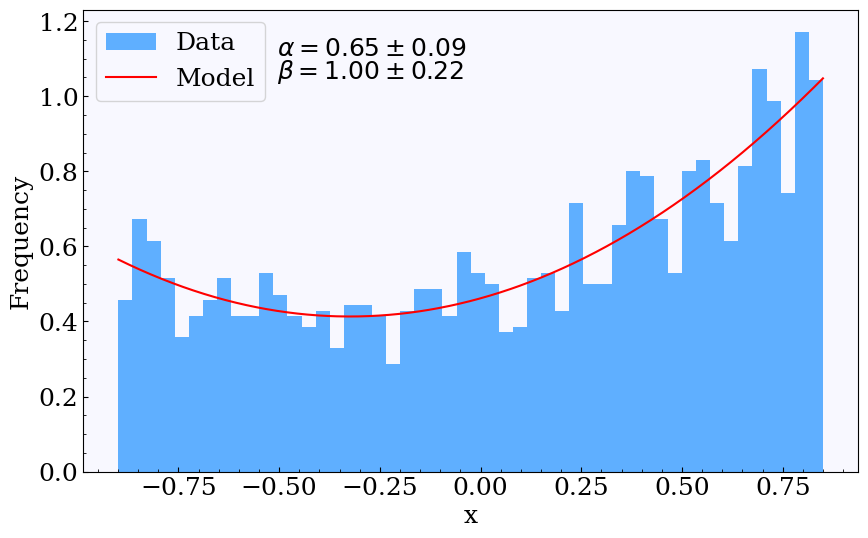

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(data, bins=50, density=True, alpha=0.7, label='Data')
ax.plot(np.sort(data), func(np.sort(data), alpha_fit, beta_fit), label='Model')
ax.text(0.25, 0.9, f'$\\alpha = {alpha_fit:.2f} \\pm {alpha_fit_err:.2f}$', transform=ax.transAxes)
ax.text(0.25, 0.85, f'$\\beta = {beta_fit:.2f} \\pm {beta_fit_err:.2f}$', transform=ax.transAxes)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
ax.legend();


In [8]:
# Investigate the distribution of the fit parameters
# Generate psedo data with Monte Carlo simulation from the function 

N_points = 2000 
N_trials = 500 
pseudo_data = []


for trial in range(N_trials):
    
    x_rans = np.random.uniform(min(data), max(data), 4*N_points)
    y_rans = np.random.uniform(0, 2.5, 4*N_points)
    func_vals = func(x_rans, alpha_fit, beta_fit, norm=False)
    trial_data = []

    i = 0 
    while len(trial_data) < N_points:

        if y_rans[i] <= func_vals[i]:
            trial_data.append(x_rans[i])
            
        i+=1

    pseudo_data.append(trial_data)


In [9]:
alpha_vals = np.zeros(N_trials)
beta_vals = np.zeros(N_trials)
initial_values = [alpha_fit, beta_fit]


for trial in range(N_trials):
        
    data = pseudo_data[trial]
    
    def fit_obj(alpha, beta):
        return -log_llh(np.sort(data), alpha, beta)

    minuit = Minuit(fit_obj, *initial_values)
    minuit.migrad()

    alpha_vals[trial] = minuit.values[0]
    beta_vals[trial] = minuit.values[1]

In [10]:
# Get the root mean square of the fit parameters
# This is NOT the uncertainties on the fit parameters
alpha_rms = np.sqrt(np.var(alpha_vals))
beta_rms = np.sqrt(np.var(beta_vals))

print(f'alpha_rms = {alpha_rms:.3f}')
print(f'beta_rms = {beta_rms:.3f}')

alpha_rms = 0.067
beta_rms = 0.151


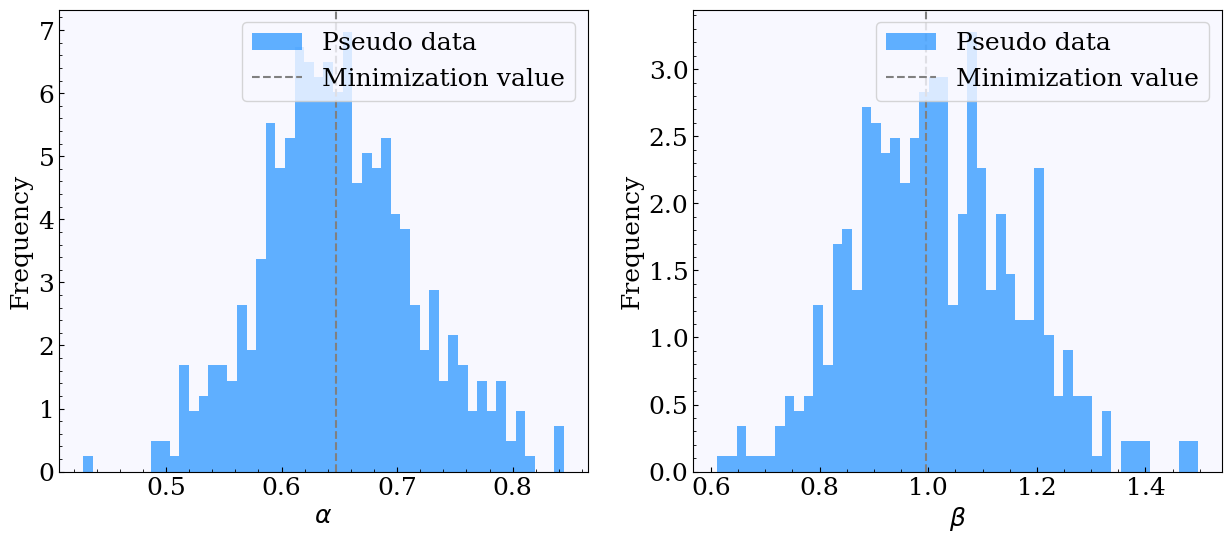

In [11]:
# Plot the distribution of the fit parameters

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].hist(alpha_vals, bins=50, density=True, alpha=0.7, label='Pseudo data')
ax[0].axvline(alpha_fit, linestyle='--', color='grey', label='Minimization value')
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].hist(beta_vals, bins=50, density=True, alpha=0.7, label='Pseudo data')
ax[1].axvline(beta_fit, linestyle='--', color='grey', label='Minimization value')
ax[1].set_xlabel(r'$\beta$')
ax[1].set_ylabel('Frequency')
ax[1].legend()

In [12]:
# Get uncertainties on the fit parameters by integrating the distribution of the fit parameters
alpha_vals = np.sort(alpha_vals)
beta_vals = np.sort(beta_vals)

alpha_low = alpha_vals[int(0.16*N_trials)]
alpha_high = alpha_vals[int(0.84*N_trials)]

print(f'Alpha parameter: {alpha_fit:.3f} +{alpha_high - alpha_fit:.3f} -{alpha_fit - alpha_low:.3f}')

beta_low = beta_vals[int(0.16*N_trials)]
beta_high = beta_vals[int(0.84*N_trials)]

print(f'Beta parameter: {beta_fit:.3f} +{beta_high - beta_fit:.3f} -{beta_fit - beta_low:.3f}')

Alpha parameter: 0.647 +0.066 -0.058
Beta parameter: 0.996 +0.177 -0.126


Text(0, 0.5, '$\\beta$')

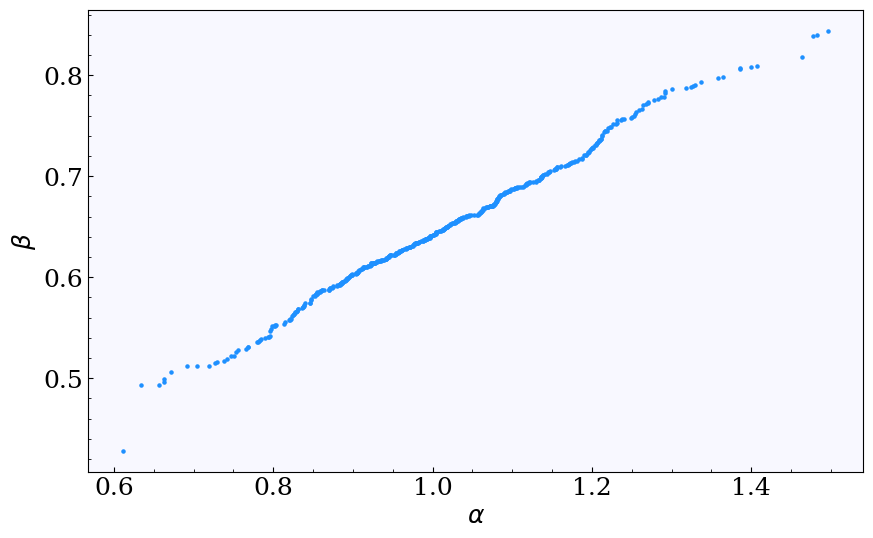

In [13]:
# 2D scatter plot of the fit parameters
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(beta_vals, alpha_vals, s=5)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')


# Exercise 2 

In [30]:
monte_data = pseudo_data[0]

# 2D raster scan for alpha and beta
alpha_vals = np.linspace(0.4, 1, 100)
beta_vals = np.linspace(0, 2, 100)

log_llh_vals = np.zeros((len(alpha_vals), len(beta_vals)))

for i, alpha in enumerate(alpha_vals):
    for j, beta in enumerate(beta_vals):
        log_llh_vals[i, j] = log_llh(monte_data, alpha, beta)


Text(0.5, 1.0, 'Raster scan of log likelihood')

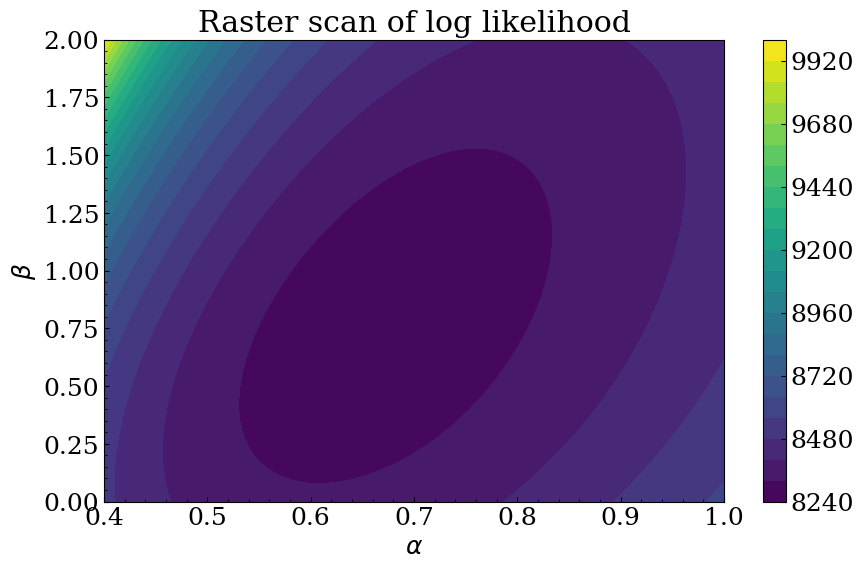

In [33]:
# Plot the raster scan
log_llh_vals = -2 * log_llh_vals

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
c = ax.contourf(alpha_vals, beta_vals, log_llh_vals, levels=25)
fig.colorbar(c, ax=ax)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_title('Raster scan of log likelihood')


In [17]:
# Find maximim of the log likelihood
max_log_llh = np.max(log_llh_vals)

# Find the indices of the maximum
max_indices = np.where(log_llh_vals == max_log_llh)

# Find the alpha and beta values at the maximum
max_alpha = alpha_vals[max_indices[0]]
max_beta = beta_vals[max_indices[1]]

print(f'alpha = {max_alpha[0]:.3f}')
print(f'beta = {max_beta[0]:.3f}')

alpha = 0.632
beta = 0.889


Text(0.5, 1.0, 'Log likelihood')

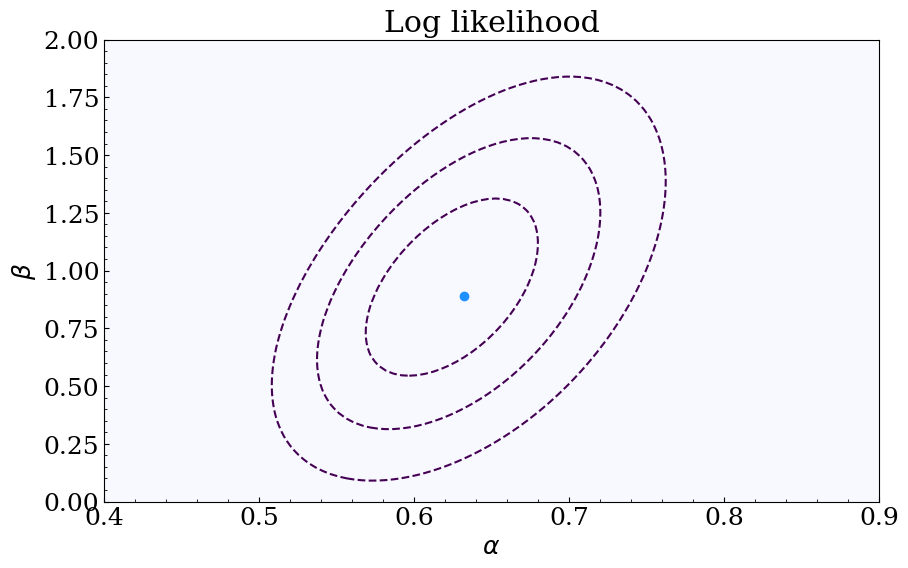

In [18]:
# Plot contour lines for the 1, 2 and 3 sigma levels

sigma_levels = [5.92, 3.09, 1.15, 0]
levels = [max_log_llh - sigma for sigma in sigma_levels]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for level in levels:
    c = ax.contour(alpha_vals, beta_vals, log_llh_vals, levels=[level], linestyles='--')

ax.plot(max_alpha, max_beta, 'o', label='Max log likelihood')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_title('Log likelihood')
